# Pickups by Day and Year

Compare 2020 and 2022 in terms of the number of candidates who picked up petitions by the number of days before the filing deadline.

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib._color_data import BASE_COLORS, TABLEAU_COLORS
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [3]:
candidates = pd.read_csv('data/candidates.csv')
candidates['pickup_date'] = pd.to_datetime(candidates['pickup_date'])
years = sorted(candidates[candidates.pickup_date.notnull()].pickup_date.dt.year.unique())

In [4]:
deadlines = {
    2020: pd.to_datetime('2020-08-05') # todo: verify this
    , 2022: pd.to_datetime('2022-08-10')
}

start_date = {
    2020: pd.to_datetime('2020-06-26')
    , 2022: pd.to_datetime('2022-07-20')
}

In [5]:
count_by_day = candidates.groupby('pickup_date').size()

count_by_year = {}
for y in years:
    count_by_year[y] = pd.DataFrame(count_by_day[count_by_day.index.year == y], columns=['pickups'])

In [6]:
comp = pd.DataFrame(index=pd.date_range(start=start_date[2020], end=deadlines[2020]))
comp = pd.merge(comp, count_by_year[2020].pickups, how='left', left_index=True, right_index=True)
comp.pickups = comp.pickups.fillna(0)
comp['cumulative_pickups_2020'] = comp.pickups.cumsum()
comp['days_to_deadline'] = (comp.index - deadlines[2020]).days
comp.drop(columns=['pickups'], inplace=True)

In [7]:
count_by_year[2022]['days_to_deadline'] = (count_by_year[2022].index - deadlines[2022]).days
comp = pd.merge(comp, count_by_year[2022], how='left', on='days_to_deadline')
# comp.pickups = comp.pickups.fillna(0)
comp['cumulative_pickups_2022'] = comp.pickups.cumsum()
comp.rename(columns={'pickups': 'pickups_2022'}, inplace=True)

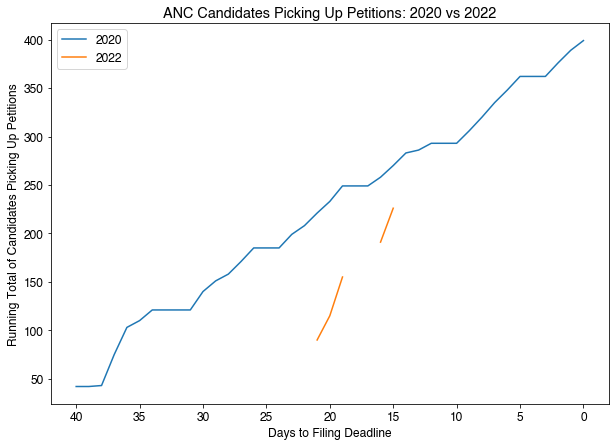

In [8]:
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize=(10,7))

plt.plot(comp['cumulative_pickups_2020'], label=2020, color='tab:blue')
plt.plot(comp['cumulative_pickups_2022'], label=2022, color='tab:orange')

xtick_range = list(range(0,len(comp), 5))
plt.xticks(ticks=xtick_range, labels=abs(comp.loc[xtick_range, 'days_to_deadline']))
plt.xlabel('Days to Filing Deadline')
plt.ylabel('Running Total of Candidates Picking Up Petitions')
plt.legend()
_ = plt.title('ANC Candidates Picking Up Petitions: 2020 vs 2022')


In [9]:
comp

,cumulative_pickups_2020,days_to_deadline,pickups_2022,cumulative_pickups_2022
0,42.0,-40,NaN,NaN
1,42.0,-39,NaN,NaN
2,43.0,-38,NaN,NaN
3,75.0,-37,NaN,NaN
4,103.0,-36,NaN,NaN
5,110.0,-35,NaN,NaN
6,121.0,-34,NaN,NaN
7,121.0,-33,NaN,NaN
8,121.0,-32,NaN,NaN
9,121.0,-31,NaN,NaN


In [15]:
comp['pickups_2022'].cumsum(skipna=False)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
Name: pickups_2022, dtype: float64